In [1]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()
%matplotlib inline

In [2]:
plt.style.use('science')
from utils import fig_size

# General binary 

In [3]:
# import phoebe
# mplfig = plt.figure(figsize=(10., 5), constrained_layout=True)
# b = phoebe.default_binary()

# b.set_value_all('ntriangles', 500)
# b['requiv@primary'] = 1.5
# b['requiv@secondary'] = 0.75

# b.add_dataset('lc', compute_phases=phoebe.linspace(0,1,101))
# b.add_dataset('mesh', compute_phases=[0.1, 0.5, 0.9])
# b.run_compute()
# afig, mplfig = b.plot(kind='lc', x='phases', axpos=212, rasterized=True)
# afig, mplfig = b.plot(kind='mesh', time=0.1, axpos=231, rasterized=True)
# afig, mplfig = b.plot(kind='mesh', time=0.5, axpos=232, rasterized=True)
# afig, mplfig = b.plot(kind='mesh', time=0.9, axpos=233, rasterized=True)
# # note: mplfig is currently None
# # each line updates the afig object with new information/data, but still has not called mpl commands
# # now we'll force the whole thing to draw to a matplotlib figure object and then manipulate it
# mplfig = afig.draw(fig=mplfig)

# mplfig.axes[1].axis('off')
# mplfig.axes[2].axis('off')
# mplfig.axes[3].axis('off')
# # mplfig.savefig('test_axes_manipulation.png')

In [54]:
b = phoebe.default_binary()
times = np.linspace(0,5,100)
# b.add_dataset('orb', compute_times=np.linspace(0,1,201), dataset='orb01')
b.add_dataset('lc', times=times, dataset='lc01')
# b.add_dataset('mesh', times=times, dataset='mesh01')
b.add_dataset('mesh', compute_phases=[0., 0.45, -0.45, 0.25, 0.5, 0.25], dataset='mesh01', columns='teffs')
# b.add_dataset('mesh', compute_phases=[0.4], dataset='mesh03')
b.set_value_all('ntriangles', 500)

In [64]:
# b.set_value_all('ld_mode', value='manual')
# b.set_value_all('atm', 'blackbody')
b.set_value_all('ntriangles', 1000)
b['requiv@primary'] = 1.5
b['requiv@secondary'] = 0.75
b['period@orbit'] = 1

In [65]:
b['teff@primary'] = 6000

In [66]:
b.run_compute()

Tue, 21 Sep 2021 19:43 BUNDLE       WARNING overwriting model: latest
100%|██████████| 104/104 [00:01<00:00, 82.98it/s]


<ParameterSet: 55 parameters | kinds: lc, mesh>

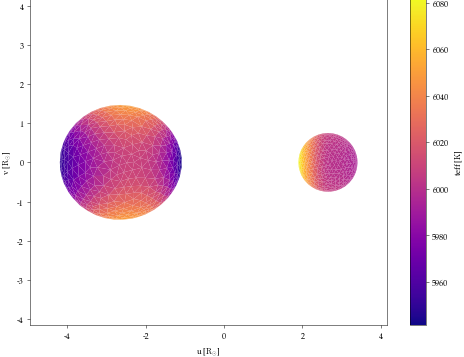

In [69]:
b['mesh01@model'].plot(phase=0.25, fc='teffs', ec='none', fcmap='plasma', 
#                        fclim=[1, 100]
                      )
afig, mplanim = b.savefig('figures/hmm3.png', tight_layouot=True,draw_sidebars=True)

In [70]:
plt.style.use('science')
plt.rcParams['axes.unicode_minus'] = False

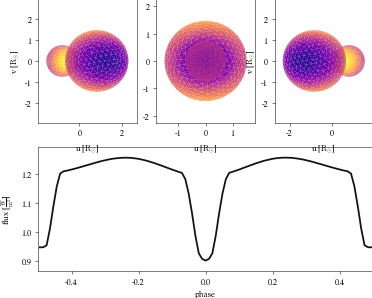

In [73]:
fig = plt.figure(figsize=[6., 5.], constrained_layout=False)

b['lc01@model'].plot(x='phase', axpos=212, rasterized=True,xlim=[-0.5, 0.5])
b['mesh01@model'].plot(phase=0, axpos=232, rasterized=True,fc='teffs', ec='none', fcmap='plasma')
b['mesh01@model'].plot(phase=-0.45, axpos=231, rasterized=True,fc='teffs', ec='none',fcmap='plasma')
b['mesh01@model'].plot(phase=0.45, axpos=233, rasterized=True,fc='teffs', ec='none', fcmap='plasma')


# ax = fig.axes[0]
# ax.set(xlabel='Phase', ylabel='Flux')

# [ax.axes('off') for ax in fig.axes[1:]];
# ax.axvline()
afig, mplanim = b.savefig('figures/EB.pdf', fig=fig, tight_layouot=True,draw_sidebars=False
                         )

In [74]:
ax = fig.axes[0]
ax.set(xlabel='Phase', ylabel='Flux')
ax.text(-0.45, 1.0, 'a)', ha='center', va='center')
ax.text(0, 1.0, 'b)', ha='center', va='center')
ax.text(0.45, 1.0, 'c)', ha='center', va='center')

[ax.axis('off') for ax in fig.axes[1:]];
fig.axes[3].annotate('c)', (0.1, 0.85), xycoords='axes fraction')
fig.axes[1].annotate('b)', (0.1, 0.85), xycoords='axes fraction')
fig.axes[2].annotate('a)', (0.1, 0.85), xycoords='axes fraction')

fig.subplots_adjust(hspace=0.05)
fig.savefig('figures/EB.pdf', dpi=300)

# Morphology

In [19]:
b = phoebe.default_binary()
# b = phoebe.default_binary(contact_binary='primary')

In [20]:
# b.add_dataset('orb', compute_times=np.linspace(0,1,201), dataset='orb01')
b.add_dataset('lc', times=np.linspace(0,1,100), dataset='lc01')
b.add_dataset('mesh', compute_times=[0], dataset='mesh01', columns='teffs')

<ParameterSet: 85 parameters | contexts: figure, compute, dataset, constraint>

In [21]:
b.set_value_all('ntriangles', 1000)
b.set_value_all('atm', 'blackbody')
b.set_value_all('ld_mode', value='manual')

Thu, 16 Sep 2021 23:48 BUNDLE       WARNING ld_mode='interp' not supported by atm='blackbody'.  Either change atm@primary@phoebe01 or ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 16 Sep 2021 23:48 BUNDLE       WARNING ld_mode='interp' not supported by atm='blackbody'.  Either change atm@primary@phoebe01 or ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 16 Sep 2021 23:48 BUNDLE       WARNING ld_mode='interp' not supported by atm='blackbody'.  Either change atm@secondary@phoebe01 or ld_mode@secondary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 16 Sep 2021 23:48 BUNDLE       WARNING ld_mode='interp' not supported by atm='blackbody'.  Either change atm@primary@phoebe01 or ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw a

In [22]:
b.set_value_all('atm', 'blackbody')
b.set_value_all('ld_mode', value='manual')
# b['requiv@primary@component'] = 1.

In [7]:
# b['q@binary'] = 1.35
# b['period@orbit'] = 0.3

In [16]:
# b['q@binary@component'] = 1.6
# b['period@component@orbit'] = 10

In [28]:
b['requiv@primary'] = 1.5
b['requiv@secondary'] = 0.75
b['period@orbit'] = 1

In [29]:
b.run_compute()

Thu, 16 Sep 2021 23:49 BUNDLE       WARNING overwriting model: latest
100%|██████████| 100/100 [00:01<00:00, 93.19it/s]


<ParameterSet: 15 parameters | kinds: mesh, lc>

/home/daniel/anaconda3/envs/phoebe/lib/python3.6/site-packages/phoebe/dependencies/autofig/figure.py:615: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


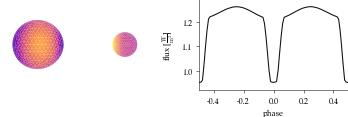

In [30]:
# mplfig = plt.figure(figsize=[fig_size()[0], 2.], constrained_layout=False)

afig, _ = b['lc01@model'].plot(x='phase', axpos=122, rasterized=True,xlim=[-0.5, 0.5])
afig, _ = b['mesh01@model'].plot(x='ws',fc='teffs', ec='none', fcmap='plasma', axpos=121,rasterized=True)

fig = plt.figure(figsize=[fig_size()[0], 2.], constrained_layout=True)
mplfig = afig.draw(fig=fig,draw_sidebars=False,)
mplfig.axes[1].axis('off')

# mplfig.axes[0].set(xticks=[], xlabel='')
# afig, mplanim = b.savefig('figures/EB/detached.pdf', fig=fig, tight_layouot=True,
#                          )
mplfig.savefig('figures/EB/detached1.pdf')

In [179]:
fig = b['mesh01@model'].plot(x='ws', fc='teffs', ec='None', fcmap='plasma',show=True)
# mplfig = afig.draw(fig=fig)

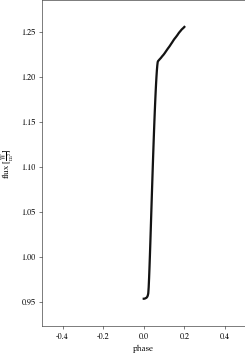

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [27]:
fig = b['lc01@model'].plot(x='phase', axpos=122, rasterized=True,xlim=[-0.5, 0.5], show=True)
fig